# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [45]:
#pip install scipy

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, how="outer")

# Display the data table for preview
mouse_study_df.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [47]:
# Checking the number of mice.
len(mouse_study_df["Mouse ID"].unique())

249

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
mouse_study_df[duplicates]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']
mouse_study_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [56]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_df["Mouse ID"].unique())


248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
column_names = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Dev', 'Tumor Volume Std Err']
drug_group = mouse_study_df.groupby('Drug Regimen')
mean_tumor_vol = drug_group['Tumor Volume (mm3)'].mean()
median_tumor_vol = drug_group['Tumor Volume (mm3)'].median()
variance_tumor_vol = drug_group['Tumor Volume (mm3)'].var()
sd_tumor_vol = drug_group['Tumor Volume (mm3)'].std()
sem_tumor_vol = drug_group['Tumor Volume (mm3)'].sem()

drug_summary = pd.concat([mean_tumor_vol, median_tumor_vol, variance_tumor_vol, sd_tumor_vol, sem_tumor_vol], axis=1)
drug_summary.set_axis(column_names, axis=1)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

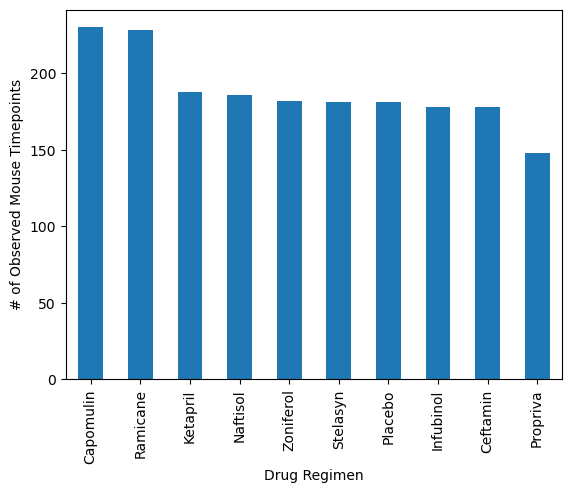

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


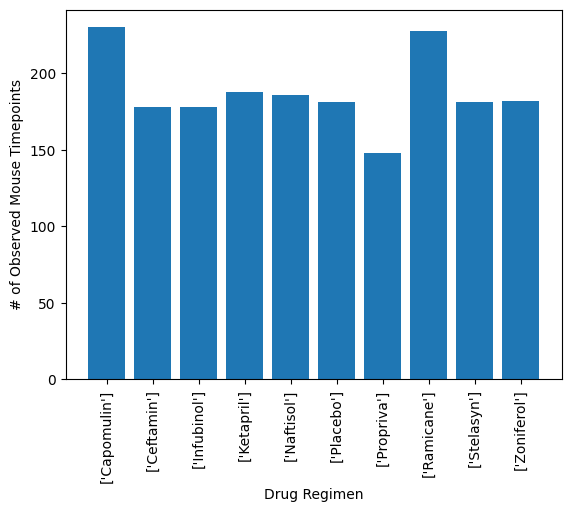

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(drug_group))
y_axis = drug_group["Mouse ID"].count()
tick_locations = [value for value in x_axis]
drug_names = drug_group['Drug Regimen'].unique()
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
